In [1]:
#!/usr/bin/python
import sys
import os
import os.path
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
from astropy.table import Table, Column 
import pyfits
from scipy.optimize import curve_fit
from astropy.stats import sigma_clip
import random
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import gridspec
######################################

In [2]:
def add_axis(ax, xlim, ylim):
    
    x1, x2 = xlim[0], xlim[1]
    y1, y2 = ylim[0], ylim[1]
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    ax.minorticks_on()
    ax.tick_params(which='major', length=7, width=1.0)
    ax.tick_params(which='minor', length=4, color='#000033', width=1.0)     
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_minor_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(2))
    
    # additional Y-axis (on the right)
    y_ax = ax.twinx()
    y_ax.set_ylim(y1, y2)
    y_ax.set_yticklabels([])
    y_ax.minorticks_on()
    y_ax.yaxis.set_major_locator(MultipleLocator(10))
    y_ax.yaxis.set_minor_locator(MultipleLocator(2))
    y_ax.tick_params(which='major', length=7, width=1.0, direction='in')
    y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')

    # additional X-axis (on the top)
    x_ax = ax.twiny()
    x_ax.set_xlim(x1, x2)
    x_ax.set_xticklabels([])
    x_ax.minorticks_on()
    x_ax.xaxis.set_major_locator(MultipleLocator(10))
    x_ax.xaxis.set_minor_locator(MultipleLocator(2))
    x_ax.tick_params(which='major', length=7, width=1.0, direction='in')
    x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')

    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
################################################################# 
######################################
def rnd_inc(inc):
    
            if inc==None: return None
            d_inc = inc - int(inc)
            if d_inc>0.5: inc=int(inc)+1
            elif d_inc<0.5: inc=int(inc)
            else:
                rand = random.randint(0,1)
                if rand==0: inc=int(inc)
                else: inc=int(inc)+1
            return inc
######################################
def inc_append(incs, email, inc):
    
    n = 0
    if email=='rbtully1@gmail.com': n = 4
    elif email=='rtully@hawaii.edu': n = 4
    elif email=='ekourkchi@gmail.com': n = 3
    elif email=='s.eftekharzadeh@gmail.com':
        if inc>55: n=2
        else: n=0
    elif email=='mokelkea@hawaii.edu': n = 3
    elif email=='chasemu@hawaii.edu': n = 3
    elif email=='jrl2014@hawaii.edu': 
        if inc<85: n=2
        else: n=0
    elif email=='dschoen@hawaii.edu': n = 3
    elif email=='adholtha@hawaii.edu': n = 4
    elif email=='chuangj@hawaii.edu': n = 2
    elif email=='mi24@hawaii.edu': n = 3
    elif email=='mka7@hawaii.edu': n = 2
    elif email=='a.danesh61@gmail.com': n = 2
    
    elif email=='cgrubner0@gmail.com': n = 1
    elif email=='pascal.jouve@free.fr': n = 2
    elif email=='dlsaintsorny@gmail.com': n = 2
    elif email=='arnaud.ohet@gmail.com': n = 1
    elif email=='hawaii@udrea.fr': n = 2
    elif email=='helenecourtois33@gmail.com': n = 2
    elif email=='claude.rene21@gmail.com': n = 1
    elif email=='fredwallet@gmail.com': n = 1
    elif email=='henri140860@wanadoo.fr': n = 1
    elif email=='joannin.lycee@free.fr': n = 2
    elif email=='bevig434@gmail.com': n = 1
    elif email=='pierrefcevey@gmail.com': n = 1
    elif email=='pierre@macweber.ch': n = 1
    elif email=='arnaudoech@gmail.com': n = 1
    elif email=='lionmarm@gmail.com': n = 1
    elif email=='neilljd@gmail.com': n = 3
    elif email=='mseibert@carnegiescience.edu': n = 3
        
    for i in range(n): incs.append(inc)
    return incs 
######################################
def correction(i, email):
    
    a=1
    b=0

    if email=='mka7@hawaii.edu':
        a = 1.0240107102873541
        b = -0.6659991913707819
    if email=='chuangj@hawaii.edu':
        a = 0.9980309937630525
        b = 1.5788591635122715
    if email=='mi24@hawaii.edu':
        a = 1.0072145584376662
        b = 0.6773836673392425
    if email=='s.eftekharzadeh@gmail.com':
        a = 0.9068608738758971
        b = 5.45353754021468
    if email=='arnaud.ohet@gmail.com':
        a = 0.8858412300804692
        b = 8.458077633514366
    if email=='cgrubner0@gmail.com':
        a = 0.8714538061236891
        b = 10.305535769873247
    if email=='pascal.jouve@free.fr':
        a = 1.0278857971914963
        b = -1.089179713885328
    if email=='a.danesh61@gmail.com':
        a = 1.0528898826418465
        b = -4.145783239004519
    if email=='helenecourtois33@gmail.com':
        a = 1.0617630700778644
        b = -1.5237124582869686
    if email=='dschoen@hawaii.edu':
        a = 0.9547149246870876
        b = 2.859742503302656   
    if email=='jrl2014@hawaii.edu':
        a = 0.980285620957423
        b = 0.37282787373070453
    if email=='chasemu@hawaii.edu':
        a = 0.9397141156597442
        b = 4.037537167990864
    if email=='henri140860@wanadoo.fr':
        a = 0.9056035997264794
        b = 6.851826918635101
    if email=='dlsaintsorny@gmail.com':
        a = 0.919185341026506
        b = 5.562153892056073        

    return a*i+b
######################################

def fitFunc(x, a, b):
    return a*x+b
######################################
def addNote(note, text):
    
    if text=='': return note
    
    if note=='':
        note = '['+text+']'
    else:
        note = note+' '+'['+text+']'
    
    return note
    

def addConcern(note, cncrn):
    
    if cncrn[0]>0: note = addNote(note, 'not_sure')
    if cncrn[1]>0: note = addNote(note, 'better_image')
    if cncrn[2]>0: note = addNote(note, 'bad_TF')
    if cncrn[3]>0: note = addNote(note, 'ambiguous')
    if cncrn[4]>0: note = addNote(note, 'disturbed')
    if cncrn[5]>0: note = addNote(note, 'HI')
    if cncrn[6]>0: note = addNote(note, 'face_on')
    if cncrn[7]>0: note = addNote(note, 'not_spiral')
    if cncrn[8]>0: note = addNote(note, 'multiple')
    return note
######################################
#######################################
def getINC(include_Email=None, exclude_Email=[]):
    
    if include_Email==None:
        emails = ['rtully@hawaii.edu', 'rbtully1@gmail.com','ekourkchi@gmail.com','mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'adholtha@hawaii.edu'] 
    else: 
        emails = include_Email
    
    
    #### Manoa
    inFile = '../EDD.inclination.All.Manoa.24May2019171448.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout    = table['pgcID']
    inc_incout    = table['inc']
    flag_incout   = table['flag']
    note          = [' '.join(dummy.split()) for dummy in table['note']]
    email         = [' '.join(dummy.split()) for dummy in table['email']]
    NS = table['not_sure']
    BI = table['better_image']
    TF = table['bad_TF']
    AM = table['ambiguous']
    DI = table['disturbed']
    HI = table['HI']
    FO = table['face_on']
    NP = table['not_spiral']
    MU = table['multiple']
    
    #### Guest
    inFile = '../EDD.inclination.All.Guest.24May2019171436.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout_    = table['pgcID']
    inc_incout_    = table['inc']
    flag_incout_   = table['flag']
    note_          = [' '.join(dummy.split()) for dummy in table['note']]
    email_         = [' '.join(dummy.split()) for dummy in table['email']]
    NS_ = table['not_sure']
    BI_ = table['better_image']
    TF_ = table['bad_TF']
    AM_ = table['ambiguous']
    DI_ = table['disturbed']
    HI_ = table['HI']
    FO_ = table['face_on']
    NP_ = table['not_spiral']
    MU_ = table['multiple']
    
    
    PGC = []
    for i in range(len(pgc_incout)):
        if not pgc_incout[i] in PGC:
            PGC.append(pgc_incout[i])
    for i in range(len(pgc_incout_)):
        if not pgc_incout_[i] in PGC:
            PGC.append(pgc_incout_[i])        
            
            
    incDict = {}
    for i in range(len(PGC)):   
        
        data = []
        
        indx = np.where(PGC[i] == pgc_incout)
        for j in indx[0]:
            if email[j] in emails and not email[j] in exclude_Email:
                inc_incout[j] = correction(inc_incout[j], email[j])
                data.append([email[j], inc_incout[j],flag_incout[j],note[j], [NS[j], BI[j], TF[j], AM[j], DI[j], HI[j], FO[j], NP[j], MU[j]]])

        indx = np.where(PGC[i] == pgc_incout_)
        for j in indx[0]:
            if email_[j] in emails and not email_[j] in exclude_Email:
                inc_incout_[j] = correction(inc_incout_[j], email[j])
                data.append([email[j], inc_incout_[j],flag_incout_[j],note_[j], [NS_[j], BI_[j], TF_[j], AM_[j], DI_[j], HI_[j], FO_[j], NP_[j], MU_[j]]])

        incDict[PGC[i]] = data
        
        
    return incDict   
###########################################################          
######################################
def incMedian(incDic):
    
    boss = 'ekourkchi@gmail.com'
    
    Keypeople = []
    for item in incDic:
        Keypeople.append(item[0])
        if item[0] == 'rbtully1@gmail.com':
            boss = 'rbtully1@gmail.com'
        if item[0] == 'rtully@hawaii.edu':
            boss = 'rtully@hawaii.edu'            
            

    flag = 0
    inc  = 0
    note = ''
    stdev = 0
    n = 0   # number of good measurments
    concerns = np.zeros(9)
    
    if boss in Keypeople:
        
        poss_i = 0
        for ppl in Keypeople:
            if ppl==boss: break
            poss_i+=1
        
        if incDic[poss_i][2] != 0:  # boss has flagged it
            
            flag = 1
            for item in incDic:
                if item[2]==1:
                   note =  addNote(note, item[3])
                   concerns+=np.asarray(item[4])
                   n+=1
        
        else:  # boss has NOT flagged it
            
            flag = 0
            incs = []
            incs2 = []
            for item in incDic:
                if item[2]==0:
                    incs.append(item[1])
                    incs2 = inc_append(incs2, item[0], item[1])
                    note = addNote(note, item[3])
                    n+=1
            
            
            incs = np.asarray(incs)
            filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
            incs = filtered_data.data[np.logical_not(filtered_data.mask)]
            stdev = np.std(incs)

            incs2 = np.asarray(incs2)
            filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
            incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
            inc = np.median(incs2)
        
    else:
        flag = []
        for item in incDic:
            flag.append(item[2])
        flag = np.median(flag)
        if flag > 0: flag =1
        
        incs = []
        incs2 = []
        for item in incDic:
            if item[2]==flag:
               incs.append(item[1])
               incs2 = inc_append(incs2, item[0], item[1])
               note = addNote(note, item[3])
               concerns+=np.asarray(item[4])
               n+=1
        
        incs = np.asarray(incs)
        filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
        incs = filtered_data.data[np.logical_not(filtered_data.mask)]
        stdev = np.std(incs)

        incs2 = np.asarray(incs2)
        filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
        incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
        inc = np.median(incs2)
            
    note = addConcern(note, concerns)
    #inc = rnd_inc(inc)
    
    return inc, stdev, flag, note, n

#######################################

######################################
class cd:
    """Context manager for changing the current working directory"""
    def __init__(self, newPath):
        self.newPath = os.path.expanduser(newPath)

    def __enter__(self):
        self.savedPath = os.getcwd()
        os.chdir(self.newPath)

    def __exit__(self, etype, value, traceback):
        os.chdir(self.savedPath)
 

def rnd_inc(inc):
    
            if inc==None: return None
            d_inc = inc - int(inc)
            if d_inc>0.5: inc=int(inc)+1
            elif d_inc<0.5: inc=int(inc)
            else:
                rand = random.randint(0,1)
                if rand==0: inc=int(inc)
                else: inc=int(inc)+1
            return inc
######################################
def inc_append(incs, email, inc):
    
    n = 0
    if email=='rbtully1@gmail.com': n = 4
    elif email=='rtully@hawaii.edu': n = 4
    elif email=='ekourkchi@gmail.com': n = 3
    elif email=='s.eftekharzadeh@gmail.com':
        if inc>55: n=2
        else: n=0
    elif email=='mokelkea@hawaii.edu': n = 3
    elif email=='chasemu@hawaii.edu': n = 3
    elif email=='jrl2014@hawaii.edu': 
        if inc<85: n=2
        else: n=0
    elif email=='dschoen@hawaii.edu': n = 3
    elif email=='adholtha@hawaii.edu': n = 4
    elif email=='chuangj@hawaii.edu': n = 2
    elif email=='mi24@hawaii.edu': n = 3
    elif email=='mka7@hawaii.edu': n = 2
    elif email=='a.danesh61@gmail.com': n = 2
    
    elif email=='cgrubner0@gmail.com': n = 1
    elif email=='pascal.jouve@free.fr': n = 2
    elif email=='dlsaintsorny@gmail.com': n = 2
    elif email=='arnaud.ohet@gmail.com': n = 1
    elif email=='hawaii@udrea.fr': n = 2
    elif email=='helenecourtois33@gmail.com': n = 2
    elif email=='claude.rene21@gmail.com': n = 1
    elif email=='fredwallet@gmail.com': n = 1
    elif email=='henri140860@wanadoo.fr': n = 1
    elif email=='joannin.lycee@free.fr': n = 2
    elif email=='bevig434@gmail.com': n = 1
    elif email=='pierrefcevey@gmail.com': n = 1
    elif email=='pierre@macweber.ch': n = 1
    elif email=='arnaudoech@gmail.com': n = 1
    elif email=='lionmarm@gmail.com': n = 1
    elif email=='neilljd@gmail.com': n = 3
    elif email=='mseibert@carnegiescience.edu': n = 3
        
    for i in range(n): incs.append(inc)
    return incs 
######################################
def correction(i, email):
    
    a=1
    b=0

    if email=='mka7@hawaii.edu':
        a = 1.0240107102873541
        b = -0.6659991913707819
    if email=='chuangj@hawaii.edu':
        a = 0.9980309937630525
        b = 1.5788591635122715
    if email=='mi24@hawaii.edu':
        a = 1.0072145584376662
        b = 0.6773836673392425
    if email=='s.eftekharzadeh@gmail.com':
        a = 0.9068608738758971
        b = 5.45353754021468
    if email=='arnaud.ohet@gmail.com':
        a = 0.8858412300804692
        b = 8.458077633514366
    if email=='cgrubner0@gmail.com':
        a = 0.8714538061236891
        b = 10.305535769873247
    if email=='pascal.jouve@free.fr':
        a = 1.0278857971914963
        b = -1.089179713885328
#     if email=='a.danesh61@gmail.com':
#         a = 1.0528898826418465
#         b = -4.145783239004519
    if email=='helenecourtois33@gmail.com':
        a = 1.0617630700778644
        b = -1.5237124582869686
    if email=='dschoen@hawaii.edu':
        a = 0.9547149246870876
        b = 2.859742503302656   
    if email=='jrl2014@hawaii.edu':
        a = 0.980285620957423
        b = 0.37282787373070453
    if email=='chasemu@hawaii.edu':
        a = 0.9397141156597442
        b = 4.037537167990864
    if email=='henri140860@wanadoo.fr':
        a = 0.9056035997264794
        b = 6.851826918635101
    if email=='dlsaintsorny@gmail.com':
        a = 0.919185341026506
        b = 5.562153892056073        

    return a*i+b
######################################

def fitFunc(x, a, b):
    return a*x+b
######################################
def addNote(note, text):
    
    if text=='': return note
    
    if note=='':
        note = '['+text+']'
    else:
        note = note+' '+'['+text+']'
    
    return note
    

def addConcern(note, cncrn):
    
    if cncrn[0]>0: note = addNote(note, 'not_sure')
    if cncrn[1]>0: note = addNote(note, 'better_image')
    if cncrn[2]>0: note = addNote(note, 'bad_TF')
    if cncrn[3]>0: note = addNote(note, 'ambiguous')
    if cncrn[4]>0: note = addNote(note, 'disturbed')
    if cncrn[5]>0: note = addNote(note, 'HI')
    if cncrn[6]>0: note = addNote(note, 'face_on')
    if cncrn[7]>0: note = addNote(note, 'not_spiral')
    if cncrn[8]>0: note = addNote(note, 'multiple')
    return note
######################################
#######################################
def getINC(include_Email=None, exclude_Email=[]):
    
    if include_Email==None:
        emails = ['rtully@hawaii.edu', 'rbtully1@gmail.com','ekourkchi@gmail.com','mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'adholtha@hawaii.edu'] 
    else: 
        emails = include_Email
    
    
    #### Manoa
    inFile = '../EDD.inclination.All.Manoa.24May2019171448.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout    = table['pgcID']
    inc_incout    = table['inc']
    flag_incout   = table['flag']
    note          = [' '.join(dummy.split()) for dummy in table['note']]
    email         = [' '.join(dummy.split()) for dummy in table['email']]
    NS = table['not_sure']
    BI = table['better_image']
    TF = table['bad_TF']
    AM = table['ambiguous']
    DI = table['disturbed']
    HI = table['HI']
    FO = table['face_on']
    NP = table['not_spiral']
    MU = table['multiple']
    
    #### Guest
    inFile = '../EDD.inclination.All.Guest.24May2019171436.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout_    = table['pgcID']
    inc_incout_    = table['inc']
    flag_incout_   = table['flag']
    note_          = [' '.join(dummy.split()) for dummy in table['note']]
    email_         = [' '.join(dummy.split()) for dummy in table['email']]
    NS_ = table['not_sure']
    BI_ = table['better_image']
    TF_ = table['bad_TF']
    AM_ = table['ambiguous']
    DI_ = table['disturbed']
    HI_ = table['HI']
    FO_ = table['face_on']
    NP_ = table['not_spiral']
    MU_ = table['multiple']
    
    
    PGC = []
    for i in range(len(pgc_incout)):
        if not pgc_incout[i] in PGC:
            PGC.append(pgc_incout[i])
    for i in range(len(pgc_incout_)):
        if not pgc_incout_[i] in PGC:
            PGC.append(pgc_incout_[i])        
            
            
    incDict = {}
    for i in range(len(PGC)):   
        
        data = []
        
        indx = np.where(PGC[i] == pgc_incout)
        for j in indx[0]:
            if email[j] in emails and not email[j] in exclude_Email:
                inc_incout[j] = correction(inc_incout[j], email[j])
                data.append([email[j], inc_incout[j],flag_incout[j],note[j], [NS[j], BI[j], TF[j], AM[j], DI[j], HI[j], FO[j], NP[j], MU[j]]])

        indx = np.where(PGC[i] == pgc_incout_)
        for j in indx[0]:
            if email_[j] in emails and not email_[j] in exclude_Email:
                inc_incout_[j] = correction(inc_incout_[j], email[j])
                data.append([email[j], inc_incout_[j],flag_incout_[j],note_[j], [NS_[j], BI_[j], TF_[j], AM_[j], DI_[j], HI_[j], FO_[j], NP_[j], MU_[j]]])

        incDict[PGC[i]] = data
        
        
    return incDict   
###########################################################          
######################################
def incMedian(incDic):
    
    boss = 'ekourkchi@gmail.com'
    
    Keypeople = []
    for item in incDic:
        Keypeople.append(item[0])
        if item[0] == 'rbtully1@gmail.com':
            boss = 'rbtully1@gmail.com'
        if item[0] == 'rtully@hawaii.edu':
            boss = 'rtully@hawaii.edu'            
            

    flag = 0
    inc  = 0
    note = ''
    stdev = 0
    n = 0   # number of good measurments
    concerns = np.zeros(9)
    
    if boss in Keypeople:
        
        poss_i = 0
        for ppl in Keypeople:
            if ppl==boss: break
            poss_i+=1
        
        if incDic[poss_i][2] != 0:  # boss has flagged it
            
            flag = 1
            for item in incDic:
                if item[2]==1:
                   note =  addNote(note, item[3])
                   concerns+=np.asarray(item[4])
                   n+=1
        
        else:  # boss has NOT flagged it
            
            flag = 0
            incs = []
            incs2 = []
            for item in incDic:
                if item[2]==0:
                    incs.append(item[1])
                    incs2 = inc_append(incs2, item[0], item[1])
                    note = addNote(note, item[3])
                    n+=1
            
            
            incs = np.asarray(incs)
            filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
            incs = filtered_data.data[np.logical_not(filtered_data.mask)]
            stdev = np.std(incs)

            incs2 = np.asarray(incs2)
            filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
            incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
            inc = np.median(incs2)
        
    else:
        flag = []
        for item in incDic:
            flag.append(item[2])
        flag = np.median(flag)
        if flag > 0: flag =1
        
        incs = []
        incs2 = []
        for item in incDic:
            if item[2]==flag:
               incs.append(item[1])
               incs2 = inc_append(incs2, item[0], item[1])
               note = addNote(note, item[3])
               concerns+=np.asarray(item[4])
               n+=1
        
        incs = np.asarray(incs)
        filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
        incs = filtered_data.data[np.logical_not(filtered_data.mask)]
        stdev = np.std(incs)

        incs2 = np.asarray(incs2)
        filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
        incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
        inc = np.median(incs2)
            
    note = addConcern(note, concerns)
    #inc = rnd_inc(inc)
    
    return inc, stdev, flag, note, n

#######################################




######################################
class cd:
    """Context manager for changing the current working directory"""
    def __init__(self, newPath):
        self.newPath = os.path.expanduser(newPath)

    def __enter__(self):
        self.savedPath = os.getcwd()
        os.chdir(self.newPath)

    def __exit__(self, etype, value, traceback):
        os.chdir(self.savedPath)
 



In [3]:
inFile = '../Wise_calib_visier.csv'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_wise_vizier    = table['PGC']
inc_wise_vizier    = table['i']
b_a_wise_vizier    = table['b_a']

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [4]:
######################################
inFile = '../Wise_calib_visier.csv'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_wise_vizier    = table['PGC']
inc_wise_vizier    = table['i']
b_a_wise_vizier    = table['b_a']
######################################

inFile = '../EDD.inclination.All.Manoa.24May2019171448.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout    = table['pgcID']
inc_incout    = table['inc']
flag_incout   = table['flag']
email         = [' '.join(dummy.split()) for dummy in table['email']]


inFile = '../EDD.inclination.All.Guest.24May2019171436.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout_    = table['pgcID']
inc_incout_    = table['inc']
flag_incout_   = table['flag']
email_         = [' '.join(dummy.split()) for dummy in table['email']]
inputTable_    = [' '.join(dummy.split()) for dummy in table['inputTable']]

#name    = 'Brent'
#myEmail = 'rbtully1@gmail.com'

#name    = 'Ehsan'
#myEmail = 'ekourkchi@gmail.com'

#name    = 'Sarah'
#myEmail = 's.eftekharzadeh@gmail.com'

#name    = 'Amber'
#myEmail = 'mokelkea@hawaii.edu'

#name    = 'Chase'
#myEmail = 'chasemu@hawaii.edu'

#name    = 'Devin'
#myEmail = 'dschoen@hawaii.edu'

#name    = 'Alexandria'
#myEmail = 'adholtha@hawaii.edu'

#name    = 'Jordan'
#myEmail = 'jrl2014@hawaii.edu'

# name    = 'Juana'
# myEmail = 'chuangj@hawaii.edu'

#name    = 'Michael I.'
#myEmail = 'mi24@hawaii.edu'

#name    = 'Michael A.'
#myEmail = 'mka7@hawaii.edu'

name    = 'Arash'
myEmail = 'a.danesh61@gmail.com'

#name    = 'Charles G.'
#myEmail = 'cgrubner0@gmail.com'

#name    = 'Pascal J.'
#myEmail = 'pascal.jouve@free.fr'

#myEmail = 'dlsaintsorny@gmail.com'
#name    = 'Daniel S.'

#myEmail = 'arnaud.ohet@gmail.com'
#name    = 'Arnaud'

#name    = 'Denis'
#myEmail = 'hawaii@udrea.fr'

#name     = 'Henri'
#myEmail = 'henri140860@wanadoo.fr'

#myEmail     = 'fredwallet@gmail.com'
#name = 'Fred'

#myEmail     = 'claude.rene21@gmail.com'
#name = 'Claude-Rene'

#myEmail     = 'helenecourtois33@gmail.com'
#name = 'Helene'

#myEmail     = 'joannin.lycee@free.fr'
#name = 'Regis'

# myEmail    = 'bevig434@gmail.com'
# myEmail    = 'pierrefcevey@gmail.com'
# myEmail    = 'pierre@macweber.ch'
# myEmail    = 'arnaudoech@gmail.com'
# myEmail    = 'lionmarm@gmail.com'
# name = 'Anonymous'



A_emails = ['rtully@hawaii.edu', 'rbtully1@gmail.com', 'mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'mi24@hawaii.edu', 'chuangj@hawaii.edu']

B_emails = ['ekourkchi@gmail.com', 's.eftekharzadeh@gmail.com', 'chasemu@hawaii.edu', 'adholtha@hawaii.edu', 'mka7@hawaii.edu', 'a.danesh61@gmail.com', 'helenecourtois33@gmail.com']

C_emails = ['cgrubner0@gmail.com', 'pascal.jouve@free.fr', 'dlsaintsorny@gmail.com', 'arnaud.ohet@gmail.com', 'hawaii@udrea.fr', 'henri140860@wanadoo.fr', 'helenecourtois33@gmail.com']

D_emails = ['henri140860@wanadoo.fr', 'claude.rene21@gmail.com', 'fredwallet@gmail.com', 'joannin.lycee@free.fr', 'bevig434@gmail.com']

E_emails = ['pierrefcevey@gmail.com','pierre@macweber.ch', 'arnaudoech@gmail.com', 'lionmarm@gmail.com', 'neilljd@gmail.com', 'mseibert@carnegiescience.edu']


Goods_email=['rtully@hawaii.edu', 'rbtully1@gmail.com', 'a.danesh61@gmail.com', 'mokelkea@hawaii.edu','dschoen@hawaii.edu','ekourkchi@gmail.com','adholtha@hawaii.edu', 'mi24@hawaii.edu']

##############################################################################

#incDic = getINC(include_Email=A_emails+B_emails+E_emails, exclude_Email=myEmail)
#incDic = getINC(include_Email=A_emails+B_emails+C_emails+D_emails+E_emails, exclude_Email=myEmail)
#incDic = getINC(include_Email=Goods_email, exclude_Email=myEmail)
incDic = getINC(include_Email=A_emails+B_emails, exclude_Email=myEmail)



pgc_common   = []
old_inc       = []
online_inc   = []
No = 0 

my_inc     = []
th_inc     = []

for i in range(len(pgc_incout)):
    if email[i]==myEmail and flag_incout[i]==0 and inc_incout[i]>50 and inc_incout[i]<90:
        No+=1
        if pgc_incout[i] in incDic:
            inc, stdev, flag, note, n = incMedian(incDic[pgc_incout[i]])
            if n>=3:
                corrected_inc = correction(inc_incout[i], myEmail)
                if (np.abs(corrected_inc-inc)<10):
                    old_inc.append(corrected_inc)
                    pgc_common.append(pgc_incout[i])
                    online_inc.append(inc)
                    
                    if pgc_incout[i] in pgc_wise_vizier:
                        i_lst = np.where(pgc_wise_vizier == pgc_incout[i])
                        my_inc.append(inc)
                        th_inc.append(inc_wise_vizier[i_lst][0])
                        

i_lst = []
for i in range(len(pgc_incout_)):
    if email_[i]==myEmail:
        i_lst.append(i)


if myEmail in C_emails: 
    ignore=20
elif myEmail in D_emails: 
    ignore=20
elif myEmail in E_emails: 
    ignore=20
else: 
    ignore=0
         
for i in i_lst[:len(i_lst)-ignore]:
  if inputTable_[i]!='example_bad_galaxie' and inputTable_[i]!='example_good_galaxie':
    if flag_incout_[i]==0:
        No+=1
        if pgc_incout_[i] in incDic:
            inc, stdev, flag, note, n = incMedian(incDic[pgc_incout_[i]])
            if n>=2:
                old_inc.append(correction(inc_incout_[i], myEmail))
                pgc_common.append(pgc_incout_[i])
                online_inc.append(inc)   
##############################################################################

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


(a, b, cov) =  1.076872237766114 -5.752769210717585 [[ 8.78000897e-04 -5.85243773e-02]
 [-5.85243773e-02  3.96529652e+00]]
309


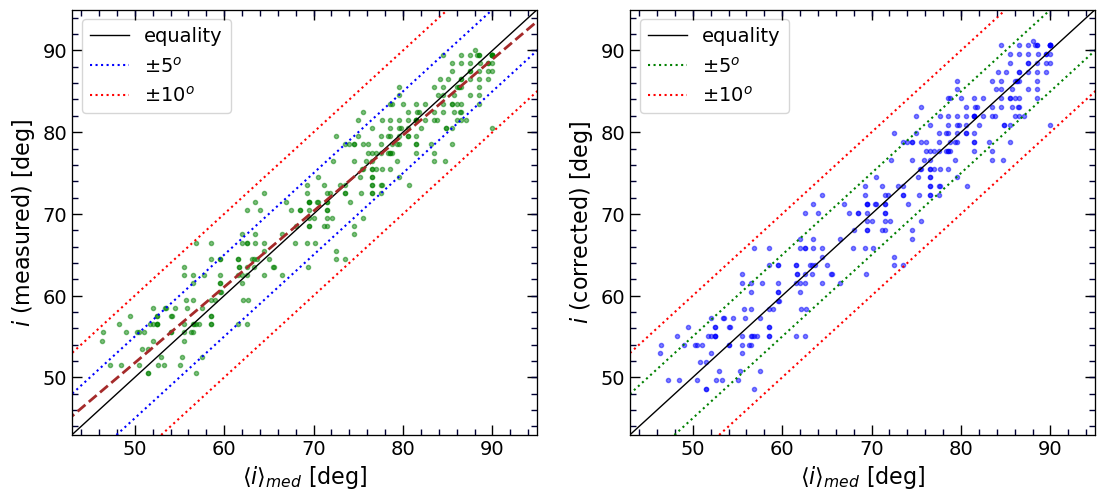

In [5]:
#### 2 plots - horizontal
fig = py.figure(figsize=(11, 5), dpi=100)    
fig.subplots_adjust(wspace=0.15, top=0.95, bottom=0.1, left=0.05, right=0.98)


ax = fig.add_subplot(121)
ax_ = fig.add_subplot(122)

ax.plot(online_inc, old_inc, 'g.', picker=5, alpha=0.5)   #### 
p1, = ax.plot([0,100], [0,100], color='black', linestyle='-', label="equality", lw=1)
p2, = ax.plot([0,100], [5,105], color='b', linestyle=':', label=r'$\pm5^o$')
ax.plot([0,100], [-5,95], color='b', linestyle=':')
p3, = ax.plot([0,100], [10,110], color='r', linestyle=':', label=r'$\pm10^o$')
ax.plot([0,100], [-10,90], color='r', linestyle=':')


pgc_common = np.asarray(pgc_common)
online_inc = np.asarray(online_inc)
old_inc = np.asarray(old_inc)

N = len(online_inc)
a1 = np.zeros(N)
a2 = np.zeros(N)


ax.set_xlim([35,100])
ax.set_ylim([35,100])
ax.set_ylabel(r'$i$'+' (measured) [deg]', fontsize=16)
ax.set_xlabel(r'$\langle i \rangle_{med}$'+' [deg]', fontsize=16)


ax.tick_params(which='major', length=5, width=2.0, direction='in')
ax.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')
ax.minorticks_on()

# Legend
lns = [p1, p2, p3]
ax.legend(handles=lns, loc=2, fontsize=14)


y = []
x = []
for i in range(len(online_inc)):
    if old_inc[i]<=80 and abs(online_inc[i]-old_inc[i])<10.:
        x.append(online_inc[i])
        y.append(old_inc[i])

x=np.asarray(x)
y=np.asarray(y)

fit  = np.polyfit(y,x, 1, cov=True)
a=1.* fit[0][0]
b=1.* fit[0][1]
cov = fit[1]
print '(a, b, cov) = ', a,b,cov



ax.plot([0,100], [-b/a,100./a-b/a], color='brown', linestyle='--', lw=2)


#fit  = np.polyfit(x,y, 1, cov=True)
#a=1.* fit[0][0]
#b=1.* fit[0][1]
#cov = fit[1]
#print '(a, b, cov) = ', a,b,cov


#ax.plot([0,100], [b,100.*a+b], color='black', linestyle='--')
#ax_.plot(online_inc, old_inc/a-b/a, 'b.', picker=5, alpha=0.5)
ax_.plot(online_inc, old_inc*a+b, 'b.', picker=5, alpha=0.5)

print len(pgc_common)

a1[np.where(online_inc<85)] = 1
a2[np.where(online_inc>50)] = 1
a0 = a1 + a2

index = np.where(a0==2)
xx = online_inc[index]
yy = old_inc[index]

delta = xx-yy
delta = delta[np.where(delta<8)]
std = np.std(delta)
rms = np.sqrt(np.mean(delta**2))

# ax.text(38,84, r'$\sigma: $'+"%.1f" % (std)+r'$^o$')
# ax.text(38,80, r'$RMS: $'+"%.1f" % (rms)+r'$^o$', fontsize=14)
#ax.text(85,60, r'$a: $'+"%.4f" % (a), color='brown')
#ax.text(85,56, r'$b: $'+"%.4f" % (b), color='brown')
#ax.text(85,52, r'$\sigma_{a}: $'+"%.4f" % np.sqrt(cov[0][0]), color='brown')
#ax.text(85,48, r'$\sigma_{b}: $'+"%.4f" % np.sqrt(cov[1][1]), color='brown')
#ax.text(85,44, r'$C_{ab}: $'+"%.4f" % (cov[0][1]), color='brown')
#######################################################
#old_inc = a*old_inc+b   #### correction
old_inc = old_inc/a-b/a   #### correction

yy = old_inc[index]

delta = xx-yy
delta = delta[np.where(delta<8)]
std = np.std(delta)
rms = np.sqrt(np.mean(delta**2))

# ax_.text(38,84, r'$\sigma: $'+"%.1f" % (std)+r'$^o$')
# ax_.text(38,80, r'$RMS: $'+"%.1f" % (rms)+r'$^o$', fontsize=14)

p1, = ax_.plot([0,100], [0,100], color='black', linestyle='-', label="equality", lw=1)
p2, = ax_.plot([0,100], [5,105], color='g', linestyle=':', label=r'$\pm5^o$')
ax_.plot([0,100], [-5,95], color='g', linestyle=':')
p3, = ax_.plot([0,100], [10,110], color='r', linestyle=':', label=r'$\pm10^o$')
ax_.plot([0,100], [-10,90], color='r', linestyle=':')
# Legend
lns = [p1, p2, p3]
ax_.legend(handles=lns, loc=2, fontsize=14)
ax_.set_xlim([35,100])
ax_.set_ylim([35,100])
ax_.set_ylabel(r'$i$'+' (corrected) [deg]', fontsize=16)
ax_.set_xlabel(r'$\langle i \rangle_{med}$'+' [deg]', fontsize=16)
ax_.tick_params(which='major', length=5, width=2.0, direction='in')
ax_.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')
ax_.minorticks_on()

#ax_.text(70,40, r"$i'=a * i + b $", fontsize=14)

#######################################################
add_axis(ax, [43,95], [43,95])
add_axis(ax_, [43,95], [43,95])

plt.subplots_adjust( wspace=0.2)




In [6]:
######################################
inFile = '../Wise_calib_visier.csv'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_wise_vizier    = table['PGC']
inc_wise_vizier    = table['i']
b_a_wise_vizier    = table['b_a']
######################################

inFile = '../EDD.inclination.All.Manoa.24May2019171448.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout    = table['pgcID']
inc_incout    = table['inc']
flag_incout   = table['flag']
email         = [' '.join(dummy.split()) for dummy in table['email']]


inFile = '../EDD.inclination.All.Guest.24May2019171436.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout_    = table['pgcID']
inc_incout_    = table['inc']
flag_incout_   = table['flag']
email_         = [' '.join(dummy.split()) for dummy in table['email']]
inputTable_    = [' '.join(dummy.split()) for dummy in table['inputTable']]



A_emails = ['rtully@hawaii.edu', 'rbtully1@gmail.com', 'mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'mi24@hawaii.edu', 'chuangj@hawaii.edu']

B_emails = ['ekourkchi@gmail.com', 's.eftekharzadeh@gmail.com', 'chasemu@hawaii.edu', 'adholtha@hawaii.edu', 'mka7@hawaii.edu', 'a.danesh61@gmail.com', 'helenecourtois33@gmail.com']

C_emails = ['cgrubner0@gmail.com', 'pascal.jouve@free.fr', 'dlsaintsorny@gmail.com', 'arnaud.ohet@gmail.com', 'hawaii@udrea.fr', 'henri140860@wanadoo.fr', 'helenecourtois33@gmail.com']

D_emails = ['henri140860@wanadoo.fr', 'claude.rene21@gmail.com', 'fredwallet@gmail.com', 'joannin.lycee@free.fr', 'bevig434@gmail.com']

E_emails = ['pierrefcevey@gmail.com','pierre@macweber.ch', 'arnaudoech@gmail.com', 'lionmarm@gmail.com', 'neilljd@gmail.com', 'mseibert@carnegiescience.edu']


Goods_email=['rtully@hawaii.edu', 'rbtully1@gmail.com', 'a.danesh61@gmail.com', 'mokelkea@hawaii.edu','dschoen@hawaii.edu','ekourkchi@gmail.com','adholtha@hawaii.edu', 'mi24@hawaii.edu']

##############################################################################


incDic = getINC(include_Email=A_emails+B_emails)



pgc_common   = []
old_inc       = []
online_inc   = []
No = 0 

my_inc     = []
th_inc     = []

for i in range(len(pgc_incout)):
    if email[i]==myEmail and flag_incout[i]==0 and inc_incout[i]>50 and inc_incout[i]<90:
        No+=1
        if pgc_incout[i] in incDic:
            inc, stdev, flag, note, n = incMedian(incDic[pgc_incout[i]])
            if pgc_incout[i] in pgc_wise_vizier:
                i_lst = np.where(pgc_wise_vizier == pgc_incout[i])
                my_inc.append(inc)
                th_inc.append(inc_wise_vizier[i_lst][0])


Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [7]:
# ['rtully@hawaii.edu', 'rbtully1@gmail.com','ekourkchi@gmail.com'
 
inFile = '../EDD.inclination.All.Manoa.24May2019171448.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout    = table['pgcID']
inc_incout    = table['inc']
flag_incout   = table['flag']
email         = [' '.join(dummy.split()) for dummy in table['email']]'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout    = table['pgcID']
inc_incout    = table['inc']
flag_incout   = table['flag']
email         = [' '.join(dummy.split()) for dummy in table['email']]


SyntaxError: EOL while scanning string literal (<ipython-input-7-ea6614262da6>, line 8)

In [ ]:
pgc_tully = pgc_incout[np.where(email=='s.eftekharzadeh@gmail.com')]

len(pgc_tully)


In [ ]:
np.where(email in ['ekourkchi@gmail.com'])

esn=[]
rbt=[]
for i, e in enumerate(email):
    if e=='ekourkchi@gmail.com':
        esn.append(i)
    if e=='rbtully1@gmail.com':
        rbt.append(i)
        
esn = np.asarray(esn)
rbt = np.asarray(rbt)

pgc_rbt = pgc_incout[rbt]
inc_rbt = inc_incout[rbt]

pgc_esn = pgc_incout[esn]
inc_esn = inc_incout[esn]

i_esn = []
i_rbt = []
for i, id in enumerate(pgc_rbt):
    if id in pgc_esn:
        j, = np.where(pgc_esn==id)
        if np.median(inc_esn[j])>45 and inc_rbt[i]>45:
            i_esn.append(np.median(inc_esn[j]))
            i_rbt.append(inc_rbt[i])

i_esn = np.asarray(i_esn)
i_rbt = np.asarray(i_rbt)  

plt.plot(i_esn, i_rbt, '.')

In [ ]:
fig = py.figure(figsize=(5.5, 5), dpi=100)
fig.subplots_adjust(hspace=0.15, top=0.95, bottom=0.15, left=0.15, right=0.95)
ax = fig.add_subplot(111)    

th_inc = i_rbt
my_inc = i_esn


p1, = ax.plot([0,100], [0,100], color='black', linestyle='-', label="equality")
p2, = ax.plot([0,100], [5,105], color='b', linestyle=':', label=r'$\pm5^o$')
ax.plot([0,100], [-5,95], color='b', linestyle=':')
p3, = ax.plot([0,100], [10,110], color='g', linestyle='--', label=r'$\pm10^o$')
ax.plot([0,100], [-10,90], color='g', linestyle='--')
ax.plot(th_inc, my_inc, 'k.', picker=5)


delta = th_inc-my_inc
delta = delta[np.where(delta<8)]
std = np.std(delta)
rms = np.sqrt(np.mean(delta**2))

ax.set_xlim([20,100])
ax.set_ylim([20,100])
ax.text(46,77, r'$RMS: $'+"%.1f" % (rms)+r'$^o$', fontsize =14, color='maroon')
#ax.text(30,90, r'$\sigma: $'+"%.1f" % (std)+r'$^o$')
ax.set_xlabel(r'$i$'+' (RBT) [deg]', fontsize=14)
ax.set_ylabel(r'$i$'+' (EK) [deg]', fontsize=14)
ax.tick_params(which='major', length=5, width=2.0, direction='in')
ax.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')
ax.minorticks_on()

# Legend
lns = [p1, p2, p3]
ax.legend(handles=lns, loc=2, fontsize=14)
add_axis(ax, [43,95], [43,95])

print len(i_rbt)